# Isotopes Fractionation
## Isoptopes are isoDOPE
### Kevin Rozmiarek

## Learning Goals

1. Understand the role of **fractionation factors** in separating isotopes in different reservoirs

2. Understand the difference between **equilibrium isotope fractionation** and **kinetic isotopic fractionation**

3. Be able to numerically demonstrate the isotopic evolution of a water reservoir as a consequence of evaporation

4. Be able to manipulate and deal with bad input data.

## Prerequisites

1. Have an understanding of what **isotopes** are and how to express them in different notations.

2. Basic understanding of **R** programming, flow control, graphing, and tibble manipulation.

## Background

Because we just finished our lesson on what isotopes are and their notation *cough*, it is time to talk about **isotope fractionation**. **Isotope fractionation** is the separation or partitioning of a reservoir(s) stable isotopes due to a processe that use masses differently. Some processes depend on the relative differences in the masses of different isotopes in chemical equilibrium (**equilibrium isotopic fractionation**). Other processes depend on rate-dependent transfers or site-specific chemical binding effects (**kinetic isotopic fractionation**).

Today we are going to talk about the evaporation of water which happens to be an example of a rate-dependent kinetic fractionation. Well... its kinetic in very dry air. Let's not go there for now. The fractionation from a process is described by using an often empirically derived non-dimensional parameter called a **fractionation factor**. Evaporation is considered to be a type of fractionation called a **Rayleigh distillation**. In an **open system**, isotopes will not return to the original reservoir once evaporated. At this point, we can write out a general form for a Rayleigh distillation that will tell us the isotopic ratio of the reservoir as a function of the remaining amount that hasn't been evaporated.

$$
\frac{R}{R_{0}} = f^{\alpha-1}
$$

where *R* = ratio of the isotopes (e.g., 18O/16O) left in the reservoir, *Ro* = initial ratio, *f* = fraction of material remaining in the reservoir, and *α* is the fractionation factor.

We can do some algebra now and rewrite this in $\delta$ notation. I will spare you the trouble.

$$
 \\
\delta_{l} = (\delta_{l,0} + 1000)f^{\alpha-1} - 1000
$$

where *0* stands for the initial δ-value of the liquid (*l*) for the case when α is the fractionation factor between vapor and liquid αvapor-liquid, and f is the fraction of liquid remaining.

## Example

The empirically derived fractionation factor associated with the phase transition during evaporation, vapor-liquid = 0.990 at 25°C. Think of this as saying that the new vapor is 10‰ lighter than the residual water. Now let's use the above equation to calculate the curve for a starting water delta value of a series of $\delta$ values from $\delta = -10$‰ to $\delta = -30$‰.

In [49]:
import numpy as np
import pandas as pd

starting_delta_values = np.linspace(-10., 30., 5) #Starting delta values for the resevoir
alpha = 0.990 #An example fractionation factor

def remaining_Delta(starting_delta_values, remaining_Water_Fraction, alpha): #Function which calculates the isotope value for the remaining water post-process
    remaining_Delta = (starting_delta_values + 1000.) * (remaining_Water_Fraction ** (alpha - 1.)) - 1000. #Application of equation 2
    return(remaining_Delta)

remaining_Water_Fraction = np.linspace(0.1, 1., 100)

calculated_Data = pd.DataFrame(np.array(remaining_Water_Fraction), columns=['remaining_Water_Fraction'])

#Iteratively adding columns for each of the starting values for all the remaining water fractions. USED FOR QUESTION 3 BELOW
for i in starting_delta_values:
    append_Array = remaining_Delta(i, remaining_Water_Fraction, alpha)
    calculated_Data[str(i)] = append_Array 

print(calculated_Data)

    remaining_Water_Fraction      -10.0        0.0       10.0       20.0  \
0                   0.100000  13.060062  23.292992  33.525922  43.758852   
1                   0.109091  12.178968  22.402998  32.627028  42.851058   
2                   0.118182  11.369117  21.584967  31.800816  42.016666   
3                   0.127273  10.619889  20.828171  31.036453  41.244735   
4                   0.136364   9.922874  20.124115  30.325357  40.526598   
..                       ...        ...        ...        ...        ...   
95                  0.963636  -9.633223   0.370481  10.374186  20.377891   
96                  0.972727  -9.726212   0.276554  10.279319  20.282085   
97                  0.981818  -9.818327   0.183508  10.185343  20.187178   
98                  0.990909  -9.909584   0.091329  10.092242  20.093156   
99                  1.000000 -10.000000   0.000000  10.000000  20.000000   

         30.0  
0   53.991782  
1   53.075088  
2   52.232516  
3   51.453016  
4   50.

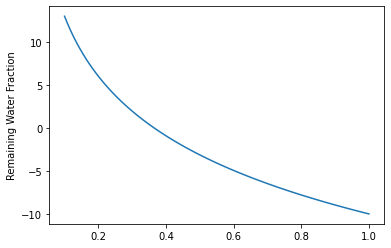

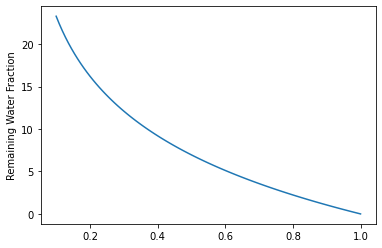

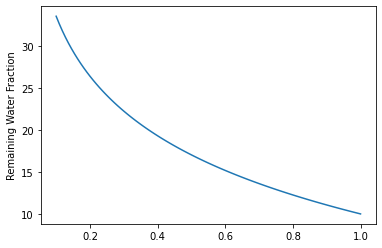

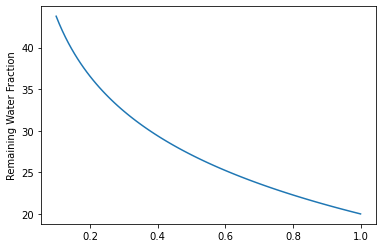

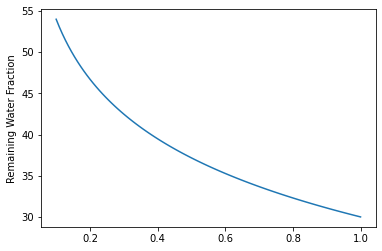

In [48]:
import matplotlib.pyplot as plt

column_Headers = list(calculated_Data.columns.values)[1:]

def plot_Function(yaxis): #Making a plot as a function. Takes y axis as input
    remaining_Water_Fraction_Plot = calculated_Data['remaining_Water_Fraction']
    remaining_Delta_Plot = calculated_Data[column_Headers[yaxis]]
    plt.plot(remaining_Water_Fraction_Plot,remaining_Delta_Plot)
    plt.ylabel('Starting delta value for 18O of' + column_Headers[yaxis] + 'permil')
    plt.ylabel('Remaining Water Fraction')
    plt.show()

for i in range(len(column_Headers)): #Iteratively making a plot for each starting value using the above function
    plot_Function(i)

## Questions

1. Let me add that the approximate temperature dependence of the fractionation factor for water evaporation follows this expression $\alpha = 0.9822e^{(7.9448 /T)}$ Show the curve for $\delta$ value of the liquid as a function of remaining unevaporated liquid. The starting isotope value of the water is $\delta = -20$ and the water is held at 35°C. Why do you think these numbers are so high and how does this all relate to us calling this system kinetic?

2. Speculate on how you would determine the isotope value for two independent fractionations happening at once.

3. Below is a new vector of some measured starting $\delta$ data. Modify the if statement in the for loop to be able to handle this tibble and show the resulting dataset. Hint: Think about how we might use the np.isnan(x) catch.

In [50]:
measured_Data = np.array([-10, np.nan, 20, 30])